In [3]:
# Import Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load datasets using absolute paths
df = pd.read_csv('../playground-series-s4e2/train.csv')

# Display the first few rows of the training data
print("Train Data:")
df.head()

Train Data:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


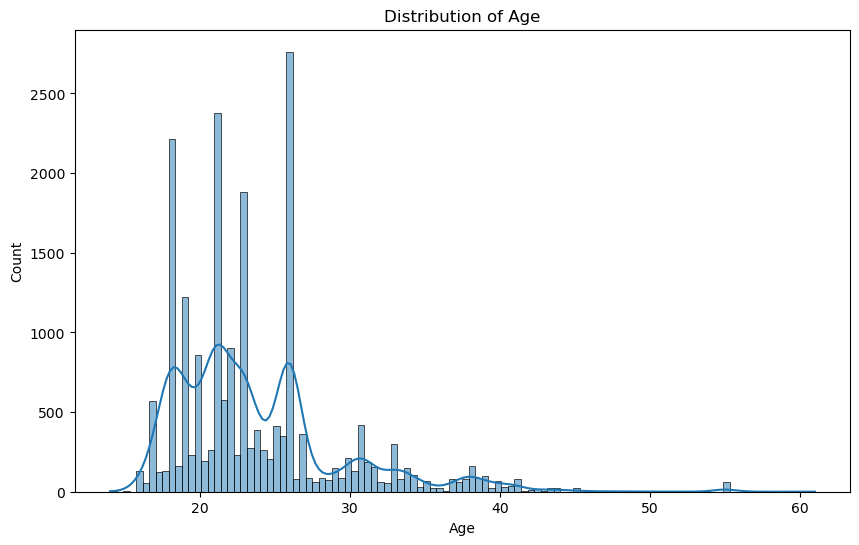

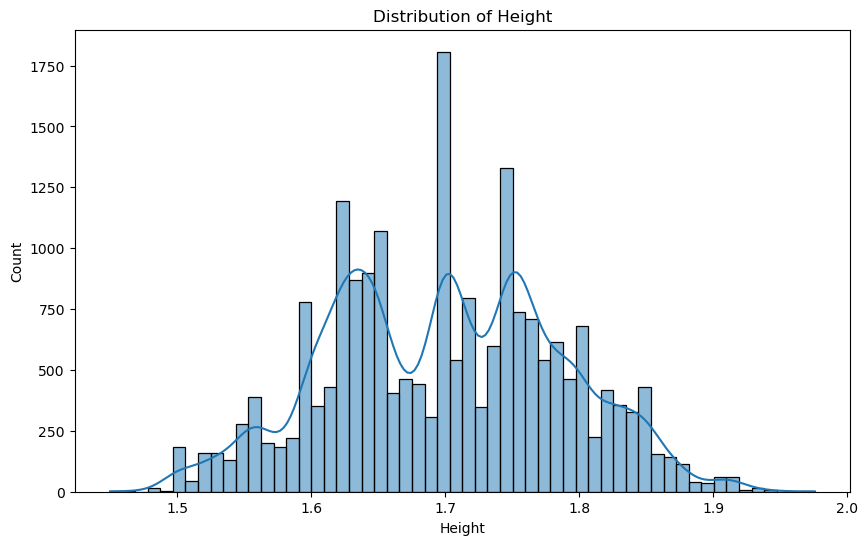

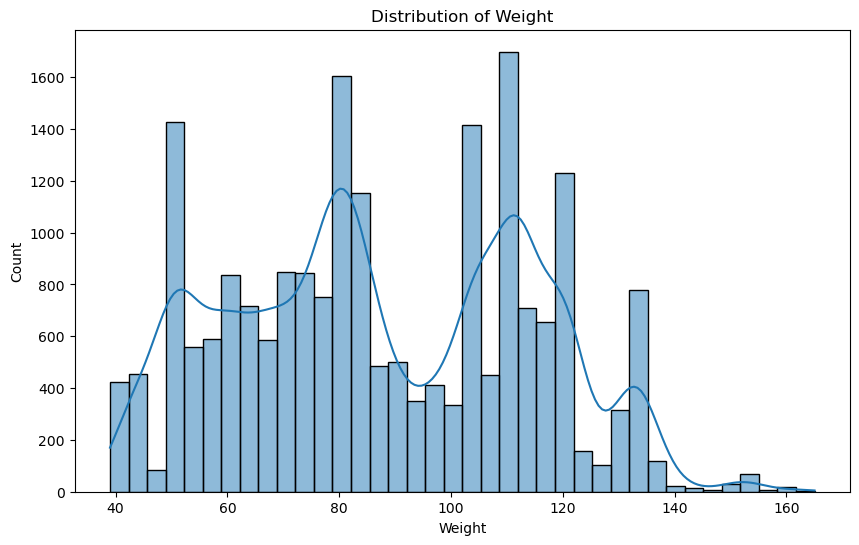

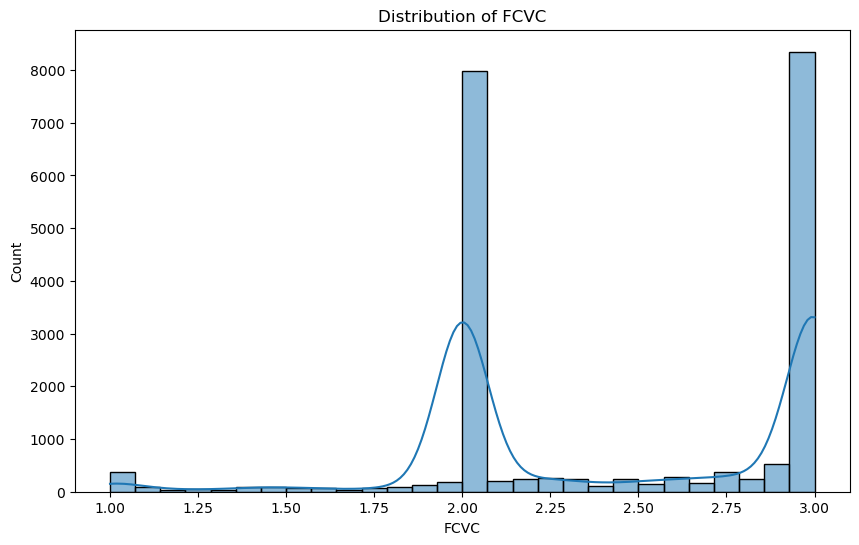

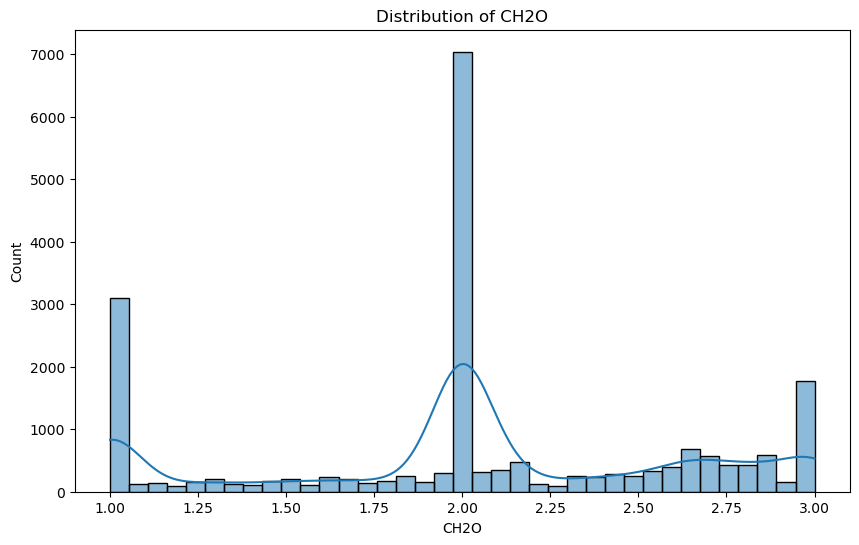

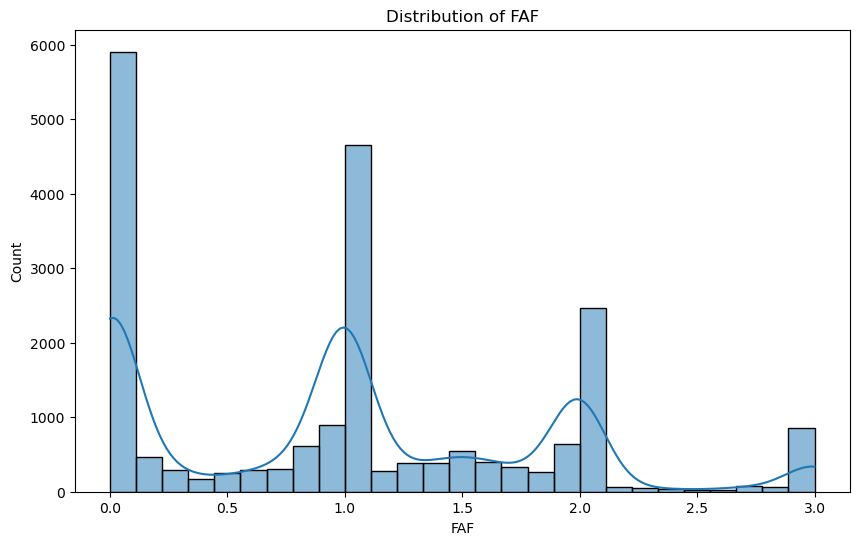

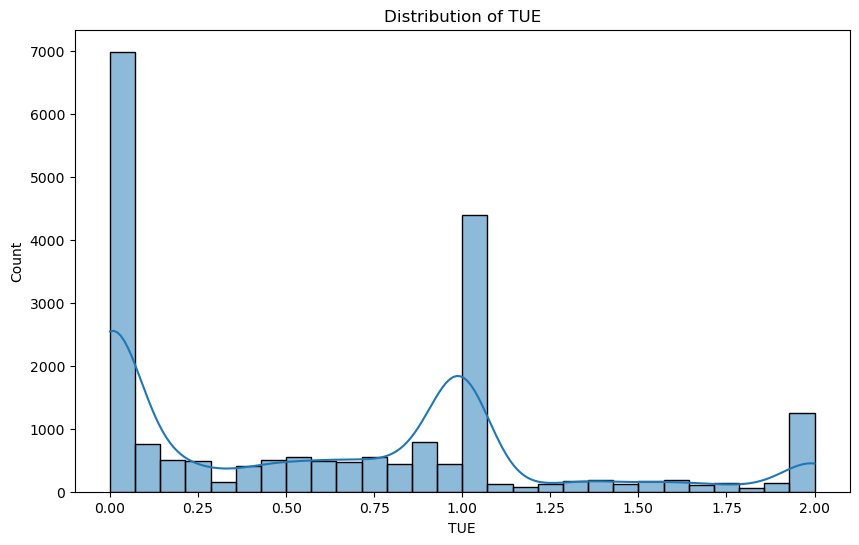

In [6]:
# Plot the distribution of numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

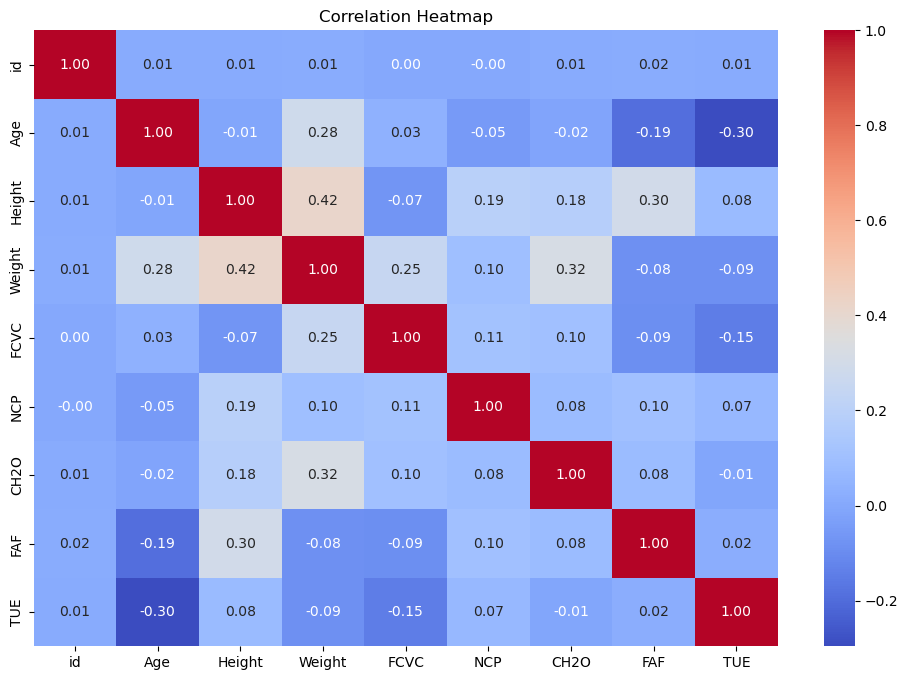

In [7]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# Encode categorical features
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target = 'NObeyesdad'

encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Encode the target variable
df[target] = encoder.fit_transform(df[target])

# Drop the 'id' column
df.drop('id', axis=1, inplace=True)

In [10]:
# SPLIT DATA INTO TRAINING AND TESTING SETS
# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8622

Confusion Matrix:
[[494  28   0   0   0   1   1]
 [ 64 501   0   0   0  59   2]
 [  2   0 457  25   3  10  46]
 [  0   0  14 639   0   0   4]
 [  0   0   0   1 802   1   0]
 [  1  50  11   0   0 340  82]
 [  0  10  78   5   1  73 347]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       524
           1       0.85      0.80      0.82       626
           2       0.82      0.84      0.83       543
           3       0.95      0.97      0.96       657
           4       1.00      1.00      1.00       804
           5       0.70      0.70      0.70       484
           6       0.72      0.68      0.70       514

    accuracy                           0.86      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.86      0.86      4152



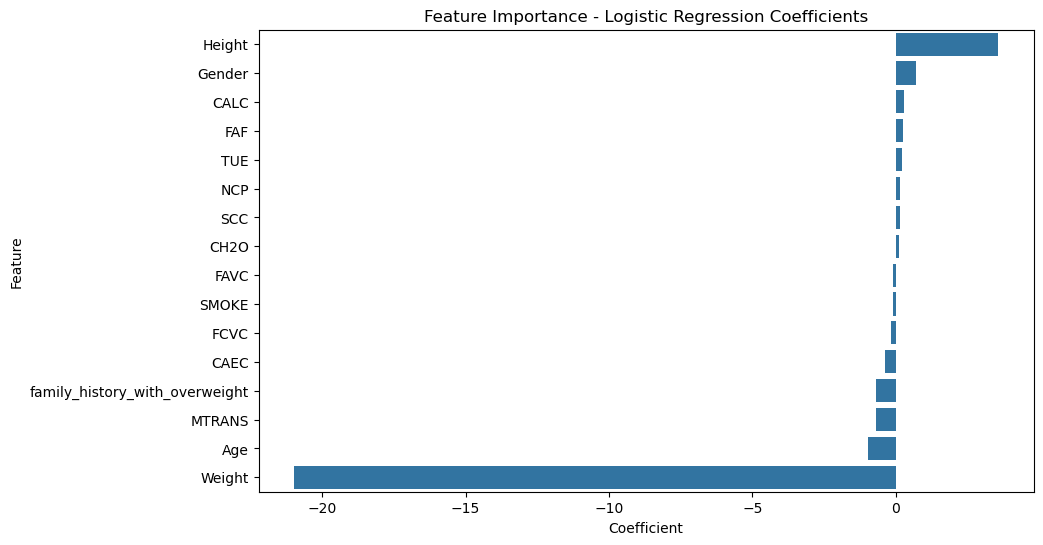

In [14]:
# Visualize the importance of features using Logistic Regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance - Logistic Regression Coefficients")
plt.show()

In [16]:
# PREPARE TEST PREDICTIONS
# Load test data
test_data = pd.read_csv('../playground-series-s4e2/test.csv')

# Preprocess the test data (similar steps as train data)
for col in categorical_columns:
    test_data[col] = encoder.transform(test_data[col])

test_data.drop('id', axis=1, inplace=True)
test_data = scaler.transform(test_data)  # Scale the test data

# Make predictions on the test data
test_predictions = logistic_model.predict(test_data)

ValueError: y contains previously unseen labels: 'Male'